In [10]:

from collections import Counter
import warnings
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import re
import os
import contractions
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [4]:
parriable = 'AVIATION'


folder_path = f'data/Resume/{parriable}'
resume_folder = os.path.basename(folder_path).lower()


with open(f'{folder_path}/{resume_folder}_resumes.txt', 'r') as resume_script:
    # open txt file and read to string
    resume_file = resume_script.read().lower()


In [1]:
with open('data/bri/data_stack_resumes.txt', 'r') as resume_script:
    # open txt file and read to string
    resume_file = resume_script.read().lower()


In [11]:
mark_text = "One hundred years ago the Russian mathematician A. A. Markov founded a new branch of probability theory by applying mathematics to poetry. Delving into the text of Alexander Pushkin’s novel in verse Eugene Onegin , Markov spent hours sifting through patterns of vowels and consonants. On January 23, 1913, he summarized his findings in an address to the Imperial Academy of Sciences in St. Petersburg. His analysis did not alter the understanding or appreciation of Pushkin’s poem, but the technique he developed—now known as a Markov chain—extended the theory of probability in a new direction. Markov’s methodology went beyond coin-flipping and dice-rolling situations (where each event is independent of all others) to chains of linked events (where what happens next depends on the current state of the system)."


In [13]:
# regex to keep only punctuation or words more than two letters long, may or may not contain an apostrophe in the middle
import re
import contractions

resume_string = re.findall(r"[,.]|[a-z]+[']?[a-z]+", resume_file)
# adds things to out list of unwanted words
more_drops = ['state', 'city', 'name', 'company', 'of', 'for', 'as',
              'college', 'am', 'the', 'to', 'on', 'in', 'with', 'and']
# toss those words to the curbs
stop_dropped_resume = [w for w in resume_string if not w in more_drops]
# Here, we will expand contractions
expanded_words = []
for word in stop_dropped_resume:
  # using contractions.fix to expand the shortened words
  expanded_words.append(contractions.fix(word))

# word_cloud_dict = Counter(expanded_words)
# more_than_once = {}
# # mor_than_one = [x for x if x.values > 1]
# for word, times in word_cloud_dict.items():
#   if times > 1:
#     more_than_once[word] = times
#     # print(word, times)
#   # print(word)

# twice_dict = [w for w in expanded_words if w in more_than_once]



# print(twice_dict)
fuck_graphs = ""

In [14]:
resume_dict = {}
# for loop that runs over every word in our string, but stating to stop at the last word
for i, word in enumerate(expanded_words[:-1]):
    # setting this word to be the word right after the one we were on
    this_word = expanded_words[i-1]
    # if this_word isn't in our dictionary already...
    if this_word not in resume_dict:
        # start our counter dict
        next_count = {}
        # add our new word to be a key in our resume dict and the count dict to be its value
        resume_dict[this_word] = next_count
    # if it is already in there....
    else:
        # create empty dictionary with this_word as the key and next_count as the value
        next_count = resume_dict[this_word]
    # if the next word(word) is in our nested dict already...
    if word in next_count:
        # add one to its count
        next_count[word] += 1
    # if its not already in there
    else:
        # lets add it and set its count to 1
        next_count[word] = 1


In [9]:
import pandas as pd 
df = pd.DataFrame.from_dict(resume_dict, orient='index').reset_index(drop=True)
# df = pd.DataFrame(data).T
df.fillna(0, inplace=True)
# print(df)
print(df.to_csv('finished_resumes/data_dict.csv', index = False))


None


In [64]:
import json

with open("finished_resumes/marc_graph.json", "w") as jason:
    json.dump(resume_dict, jason, indent = 3)
# json.dumps(resume_dict, sort_keys=True, indent=3))
df = pd.read_json("finished_resumes/json_graph.json")
df = df.T
df.to_csv("finished_resumes/marc_graph.csv")


In [74]:
import pandas as pd
import matplotlib.pyplot as plt


matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
dictionary = more_than_once
xAxis = [key for key, value in dictionary.items()]
yAxis = [value for key, value in dictionary.items()]

# change the image format to a vector one
# set_matplotlib_formats('svg')
# change the resulution to make our graph less blurry
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
array = np.zeros((8, 8))
for key in more_than_once:
    array[:, key] = more_than_once[key]

x = range(8)
for i in range(8):
    plt.scatter(x, array[i, :], label=i)

plt.legend()
plt.show()
# df.plot(kind='hist')  # histogram

# df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])

# df["species"] = pd.Categorical(
#     ["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10
# )


# df.plot.scatter(x="a", y="b")
plt.savefig(f'finished_resumes/dsa_dict_scatter_graph.png')


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [28]:
from itertools import chain
from operator import itemgetter
import networkx as nx
from networkx.readwrite import json_graph
# vg = lambda d: d.values()
# cg = itemgetter('class')
# list(map(cg, chain(*map(vg, c))))
# import pandas as pd
# df = pd.DataFrame(resume_dict)
# # df.transpose().plot.bar()
# dod = {0: {1: {"weight": 1}}}
# G = nx.from_dict_of_dicts(dod)


G = nx.Graph(resume_dict)
print(G)




Graph with 551 nodes and 955 edges


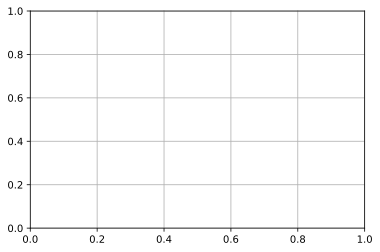

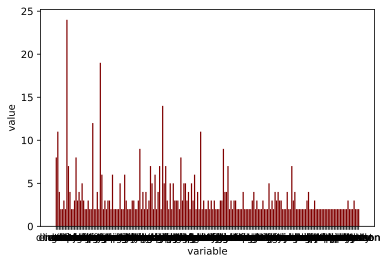

In [61]:
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
import json
import matplotlib_inline
%matplotlib inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
dictionary = more_than_once
xAxis = [key for key, value in dictionary.items()]
yAxis = [value for key, value in dictionary.items()]

# change the image format to a vector one
# set_matplotlib_formats('svg')
# change the resulution to make our graph less blurry
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.grid(True)

## LINE GRAPH ##
# plt.plot(xAxis, yAxis, color='maroon', marker='o')
# plt.xlabel('variable')
# plt.ylabel('value')

## BAR GRAPH ##
fig = plt.figure()
plt.bar(xAxis, yAxis, color='maroon')
plt.xlabel('variable')
plt.ylabel('value')
plt.savefig(f'finished_resumes/dsa_dict_bar_graph.png')

plt.show()


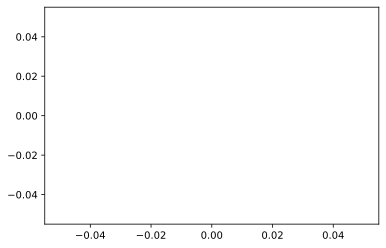

In [78]:

import matplotlib.pylab as plt

word_cloud_dict = Counter(expanded_words)
# print(word_cloud_dict)
lists = sorted(word_cloud_dict.items())  # sorted by key, return a list of tuples

x, y = zip(*lists)  # unpack a list of pairs into two tuples

plt.plot()
plt.savefig(f'finished_resumes/dsa_dict_graph.png', bbox_inches='tight')


In [79]:


wordcloud = WordCloud(
    width=1500, height=400).generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(12, 4))
plt.imshow(wordcloud)
plt.axis("off")
#plt.show()
plt.savefig(f'finished_resumes/dsa_resume_wordcloud.png', bbox_inches='tight')
plt.close()
